<a href="https://colab.research.google.com/github/chclau/CNN_tst/blob/master/gen_canvas_cnn_1605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter
np.random.seed(seed=1)

In [0]:
# Init canvas
scale    = 2;
num_img  = 10000;
num_val  = np.int16(num_img/5);
num_tst  = num_val;
img_cols = np.int16(384/scale);
img_rows = np.int16(136/scale);
man_img  = 10;
fg = 70;     # foreground gray level
bg = 140;    # background gray level
tot_img   = num_img + num_val + num_tst;
canvas    = np.full((tot_img, img_rows, img_cols), bg);
canvas_f  = np.zeros((tot_img, img_rows, img_cols));
canvas_lbl = np.zeros((tot_img));
canvas_contour = np.zeros((tot_img, img_rows, img_cols));
canvas_man = np.zeros((man_img, img_rows, img_cols))

In [0]:
# Generate pictures

line_rows   = img_rows/30
offset_rows = img_rows/30
line_cols   = img_cols/40
offset_cols = img_cols/40

for k in range(tot_img):

  # Top horiz. line
  line1_rows = np.int16(line_rows * (1 + np.random.random_sample()/5) )
  line1_irow = np.int16(offset_rows * (1 + np.random.random_sample()/5) )
  line1_icol = np.int16(offset_cols * (1 + np.random.random_sample()/5) ) 
  line1_cols = np.int16(img_cols - line_cols * (1 + np.random.random_sample()/5) - 2 * offset_cols) 

  for i in range(line1_rows):
    for j in range (line1_cols):
      canvas[k, line1_irow+i, line1_icol+j] = fg;
      
  # Top rectangle
  line_sq_rows = np.int16(line_rows * 4 * (1 + np.random.random_sample()/6) )
  line_sq_cols = np.int16(line_cols * 6 * (1 + np.random.random_sample()/8) )
  line_sq_icol = np.int16((line1_cols-line_sq_cols)/2) + line1_icol
  line_sq_irow = np.int16(line1_irow + line_rows - 1);

  for i in range(line_sq_rows):
    for j in range (line_sq_cols):
      canvas[k, line_sq_irow+i, line_sq_icol+j] = fg;

  # Bottom horiz. line
  line2_rows = np.int16(line_rows * (1 + np.random.random_sample()/5) )
  line2_irow = np.int16(img_rows - line_rows * (1 + np.random.random_sample()/5) - 2 * offset_rows)
  line2_icol = line1_icol
  line2_cols = line1_cols
  #print(line2_irow, line2_icol)

  for i in range(line2_rows):
    for j in range (line2_cols):
      canvas[k, line2_irow+i, line2_icol+j] = fg;

  # Left line
  line3_cols = np.int16(line_cols * (1 + np.random.random_sample()/5) )
  line3_rows = np.int16(img_rows * 1/2 + line_rows * np.random.random_sample() )
  line3_irow = line1_irow
  line3_icol = line1_icol

  for i in range(line3_rows):
    for j in range (line3_cols):
      canvas[k, line3_irow+i, line3_icol+j] = fg;

  # Right line
  line4_cols = np.int16(line_cols * (1 + np.random.random_sample()/5) )
  line4_rows = np.int16(img_rows * 1/2 + line_rows * np.random.random_sample() )
  line4_irow = line1_irow
  line4_icol = line2_icol+line2_cols-line4_cols

  for i in range(line4_rows):
    for j in range (line4_cols):
      canvas[k, line4_irow+i, line4_icol+j] = fg;  
      
  # Left triangle
  ltr_rows = np.int16(img_rows * 1/5 + line_rows * np.random.random_sample() )
  ltr_irow = line3_irow + line3_rows - 1
  ltr_icol = line3_icol
  ltr_cols = ltr_icol + line3_cols
  
  for i in range(ltr_rows):
    j = ltr_icol
    while (j < ltr_cols):
      canvas[k, ltr_irow+i, j] = fg;
      j = j + 1;
    ltr_cols = ltr_cols + line_cols / 10
 
  # Rigth triangle
  rtr_rows = np.int16(img_rows * 1/5 + line_rows * np.random.random_sample() )
  rtr_irow = line4_irow + line4_rows - 1
  rtr_icol = line4_icol
  rtr_cols = rtr_icol + line4_cols 
  
  for i in range(rtr_rows):
    j = rtr_cols
    while (j > rtr_icol):
      canvas[k, rtr_irow+i, j] = fg;
      j = j - 1;
    rtr_icol = rtr_icol - line_cols / 10
  
  
  # Bottom left rectangle
  lsq_rows = np.int16(line_rows * 2.5 * (1 + np.random.random_sample()/5) )
  lsq_cols = np.int16(line_rows * 3.3 * (1 + np.random.random_sample()/5) )
  lsq_irow = line2_irow
  lsq_icol = line2_icol
  
  i = lsq_irow
  j = lsq_rows
  while (j > 0):
    for m in range (lsq_cols):
      canvas[k, i-j, lsq_icol + m] = fg;
    j = j-1;

  # Bottom right rectangle
  rsq_rows = np.int16(line_rows * 1.8 * (1 + np.random.random_sample()/5) )
  rsq_cols = np.int16(line_rows * 4.2 * (1 + np.random.random_sample()/5) )
  rsq_irow = line2_irow
  rsq_icol = line2_icol+line2_cols-rsq_cols
  
  i = rsq_irow
  j = rsq_rows
  while (j > 0):
    for m in range (rsq_cols):
      canvas[k, i-j, rsq_icol + m] = fg;
    j = j-1;
    
  # Calculate contour to add faults
  im = np.array(canvas[k], dtype = np.uint8)
  canvas_contour[k] = cv2.Canny(im, fg, bg)
  
  # Generate clean pictures for manual examples
  for k in range(man_img):
    canvas_man[k] = canvas[k]
  

In [0]:
# Add faults
for k in range(tot_img):
  decision = np.random.random_sample()
  if decision < 0.33:
    
    # Add excess rectangle
    found = 0;
    canvas_lbl[k] = 1;
    while (found == 0):
      row = np.int16(img_rows * np.random.random_sample())
      col = np.int16(img_cols * np.random.random_sample())
      
      if (canvas_contour[k, row, col] !=0):
        found = 1
        row = row - 2
        col = col - 4
        fault_rows = np.int16(line_rows * 2.2 * (1 + np.random.random_sample()/5) )
        fault_cols = np.int16(line_cols * 2.2 * (1 + np.random.random_sample()/5) )
        for i in range(fault_rows):
          for j in range (fault_cols):
            if ((row+i) < img_rows) and ((col+j) < img_cols):
              canvas[k, row+i, col+j] = fg;
  elif decision < 0.66:
    
    # Add defect rectangle
    found = 0;
    canvas_lbl[k] = 2;
    while (found == 0):
      row = np.int16(img_rows * np.random.random_sample())
      col = np.int16(img_cols * np.random.random_sample())
      
      if (canvas_contour[k, row, col] !=0):
        found = 1
        row = row - 2
        col = col - 4
        fault_rows = np.int16(line_rows * 2.2 * (1 + np.random.random_sample()/5) )
        fault_cols = np.int16(line_cols * 2.2 * (1 + np.random.random_sample()/5) )
        for i in range(fault_rows):
          for j in range (fault_cols):
            if ((row+i) < img_rows) and ((col+j) < img_cols):
              canvas[k, row+i, col+j] = bg;
  else:
    canvas_lbl[k] = 0;
  
      


In [0]:
# Filter pictures
for k in range(tot_img):
  canvas_f[k] = gaussian_filter(canvas[k], sigma=0.7)


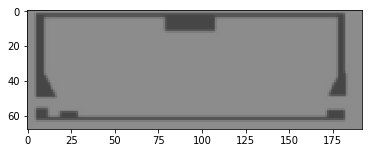

In [37]:
plt.imshow(canvas_f[1], cmap='gray', vmin=0, vmax=255)
plt.show()

In [0]:
# Model
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_rows, img_cols, 1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(32, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(3,  activation='softmax'))
network.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# Fit
from keras.utils import to_categorical
canvas_images = canvas_f[:num_img].reshape((num_img, img_rows, img_cols, 1))
old_max = np.amax(canvas)
old_min = np.amin(canvas)
canvas_images = (canvas_images.astype('float32') - old_min) * 2 / (old_max - old_min) - 1;  # Training data normalization
categ_labels = to_categorical(canvas_lbl[:num_img])
canvas_val   = canvas_f[num_img:num_img+num_val].reshape((num_val, img_rows, img_cols, 1))
canvas_val = (canvas_val.astype('float32') - old_min) * 2 / (old_max - old_min) - 1;        # Validation data normalization
lbl_val = to_categorical(canvas_lbl[num_img:num_img+num_val])
history = network.fit(canvas_images, categ_labels, epochs=16, batch_size=80, validation_data=(canvas_val, lbl_val))


Train on 10000 samples, validate on 2000 samples
Epoch 1/16
10000/10000 [==============================] - 175s 18ms/step - loss: 1.1004 - acc: 0.3654 - val_loss: 1.0276 - val_acc: 0.3550
Epoch 2/16
10000/10000 [==============================] - 174s 17ms/step - loss: 0.8208 - acc: 0.5808 - val_loss: 0.6822 - val_acc: 0.5735
Epoch 3/16
10000/10000 [==============================] - 174s 17ms/step - loss: 0.5559 - acc: 0.7436 - val_loss: 0.4865 - val_acc: 0.7730
Epoch 4/16
10000/10000 [==============================] - 176s 18ms/step - loss: 0.4131 - acc: 0.8196 - val_loss: 0.3379 - val_acc: 0.8395
Epoch 5/16
10000/10000 [==============================] - 174s 17ms/step - loss: 0.3223 - acc: 0.8733 - val_loss: 0.2326 - val_acc: 0.9060
Epoch 6/16
10000/10000 [==============================] - 174s 17ms/step - loss: 0.1820 - acc: 0.9538 - val_loss: 0.1078 - val_acc: 0.9745
Epoch 7/16
10000/10000 [==============================] - 174s 17ms/step - loss: 0.1082 - acc: 0.9732 - val_loss: 0.0

In [41]:
# Evaluate results with test array
canvas_tst = canvas_f[-num_tst:].reshape((num_tst, img_rows, img_cols, 1))
canvas_tst = (canvas_tst.astype('float32') - old_min) * 2 / (old_max - old_min) - 1
categ_tst = to_categorical(canvas_lbl[-num_tst:])
network.evaluate(canvas_tst, categ_tst)

2000/2000 [==============================] - 9s 4ms/step


[0.034815044917166235, 0.992]

In [47]:
# Predict single result
pred = (canvas_f[13012].astype('float32') - old_min) * 2 / (old_max - old_min) - 1

network.predict(pred.reshape((1, img_rows, img_cols, 1)))

array([[3.210290e-06, 9.999968e-01, 4.290828e-13]], dtype=float32)

In [45]:
canvas_lbl[13010:13020]

array([0., 2., 1., 2., 2., 0., 1., 2., 0., 0.])

In [0]:
# Build manual samples with holes

